In [15]:
import glob

glob.glob('../data/*')

['../data/10.dcm', '../data/1.dcm', '../data/original']

Automatically created module for IPython interactive environment

Filename.........: ../data/10.dcm

Patient's name...: ID00007637202177411956430, 
Patient id.......: ID00007637202177411956430
Modality.........: CT
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.652344, 0.652344]
Slice location...: -159.750


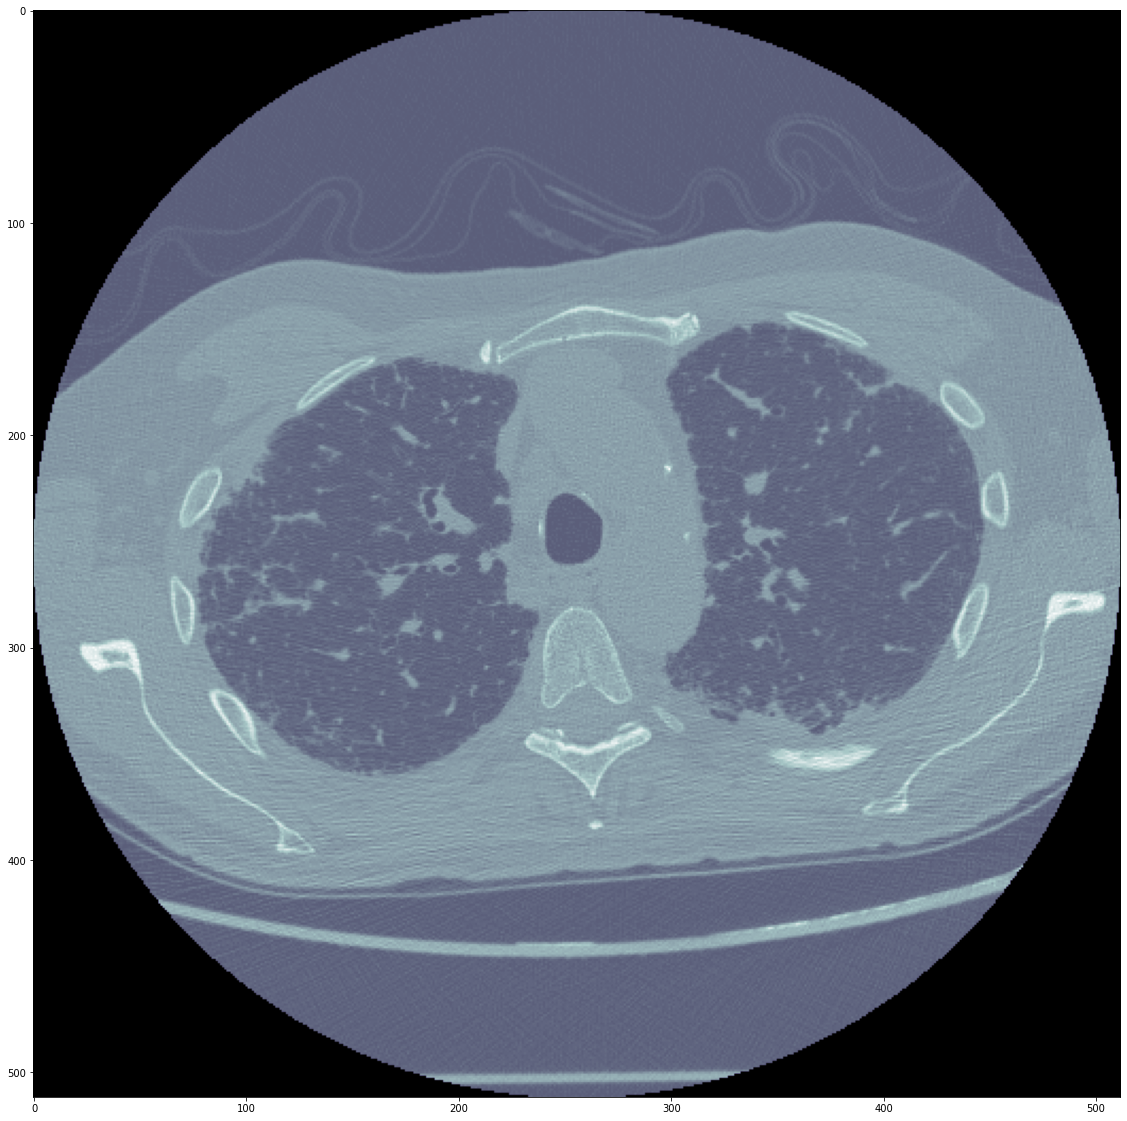

In [18]:
import matplotlib.pyplot as plt
import pydicom
import glob

print(__doc__)

filename = '../data/10.dcm'
dataset = pydicom.dcmread(filename)

# Normal mode:
print()
print("Filename.........:", filename)
# print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
# print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.figure(figsize = (20,20))
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()